In [30]:
import pandas as pd #data frame
import numpy as np #mathematical use
import seaborn as sns
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
# "% matplotlib inline" tells to display matplotlib plots directly within the notebook output cells, instead of opening them in a separate window

In [31]:
df = pd.read_csv('Regulatory Affairs of Road Accident Data 2020 India.csv', encoding = 'unicode_escape')

In [32]:
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [33]:
df.tail()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0
9549,Vizaq,Weather,Sunny/Clear,Total Injured,813.0


In [34]:
df.shape

(9550, 5)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [36]:
#counting the null values
pd.isnull(df).sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
#dropping the tables containing null values
df.shape

(9547, 5)

In [39]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [40]:
df[['Million Plus Cities', 'Cause category', 'Cause Subcategory','Outcome of Incident', 'Count']].describe()

,Count
count,9547.000000
mean,103.627632
std,275.189303
min,0.000000
25%,0.000000
50%,12.000000
75%,70.500000
max,3148.000000


## Exploratory Data Analysis

### Top 5 Cities with the most accident occurence

In [41]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

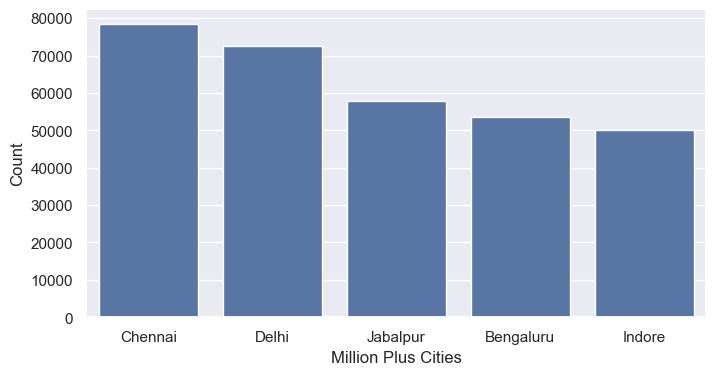

In [42]:
#displays the graph of top total number of accidents 
# grouping and sorting of amount for each state
accident_states = df.groupby(['Million Plus Cities'], as_index=False)['Count'].sum().sort_values(by='Count', ascending=False).head(5)
sns.set(rc={'figure.figsize':(8,4)}) #providing the size of the bars in the graph
sns.barplot(data = accident_states, x = 'Million Plus Cities',y= 'Count') # plotting the graph, labeling the x and y axis
plt.show()

### Top categories that cause accidents

In [43]:
#counting the numbers of accidents caused by each category
cause_category = df.groupby(['Cause category'], as_index=False)['Count'].sum().sort_values(by='Count', ascending=False)
print(cause_category)

             Cause category     Count
1                  Junction  173308.0
2             Road Features  173308.0
3           Traffic Control  173308.0
4         Traffic Violation  173308.0
5                   Weather  173308.0
0  Impacting Vehicle/Object  122793.0


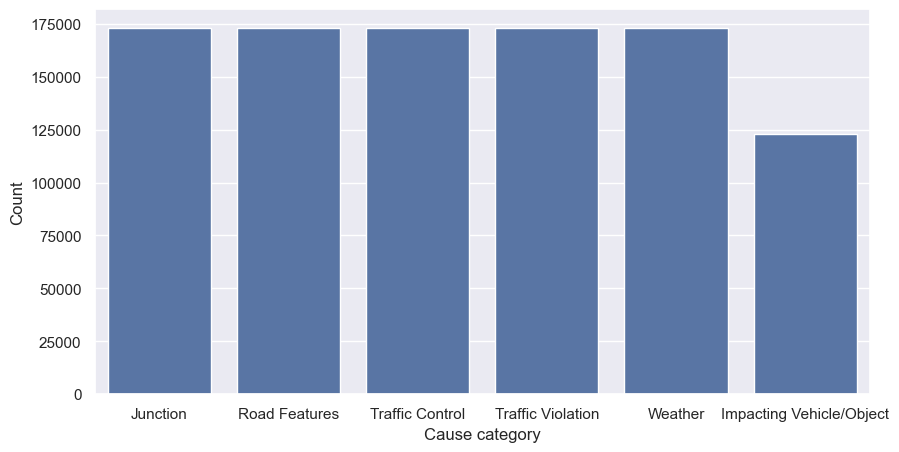

In [45]:
cause_category = df.groupby(['Cause category'], as_index=False)['Count'].sum().sort_values(by='Count', ascending=False)
sns.barplot(data = cause_category, x = 'Cause category',y= 'Count') # plotting the graph, labeling the x and y axis
sns.set(rc={'figure.figsize':(12,5)}) #providing the size of the bars in the graph
plt.show()

### Top 5 sub-categories that cause accidents

In [47]:
#counting the numbers of accidents caused by each category
sub_cause_category = df.groupby(['Cause Subcategory'], as_index=False)['Count'].sum().sort_values(by='Count', ascending=False)
print(sub_cause_category)

                                   Cause Subcategory      Count
16                                            Others  283486.00
27                                       Sunny/Clear  126904.00
17                                              Over  123013.00
26                                     Straight Road  104223.00
31                                      Two Wheelers   54356.00
32                                      Uncontrolled   50001.00
28                                                 T   23555.00
18                                        Pedestrian   22189.00
23                                Staggered Junction   18910.00
4                          Cars, Taxis, Vans and LMV   17263.00
6                                        Curved Road   16734.75
21                                             Rainy   15421.00
11                                 Four arm Junction   15314.00
34                                                 Y   10892.00
10                                   Fog

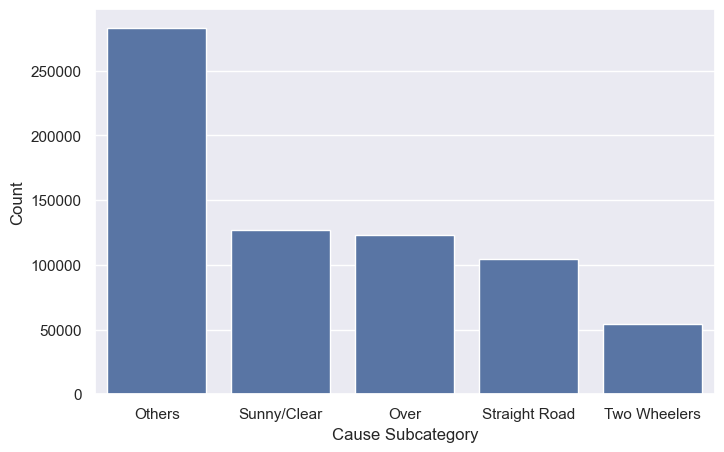

In [63]:
sub_cause_category = df.groupby(['Cause Subcategory'], as_index=False)['Count'].sum().sort_values(by='Count', ascending=False).head(5)
sns.barplot(data = sub_cause_category, x = 'Cause Subcategory',y= 'Count') # plotting the graph, labeling the x and y axis
sns.set(rc={'figure.figsize':(10,5)})#providing the size of the bars in the graph
#plt.title("Top 10 Subcategory Causes of Accidents", fontsize=18)
plt.show()

         Outcome of Incident     Count
4  Total number of Accidents  352416.0
3              Total Injured  252575.0
1               Minor Injury  179898.0
0         Greviously Injured  123192.0
2             Persons Killed   81252.0


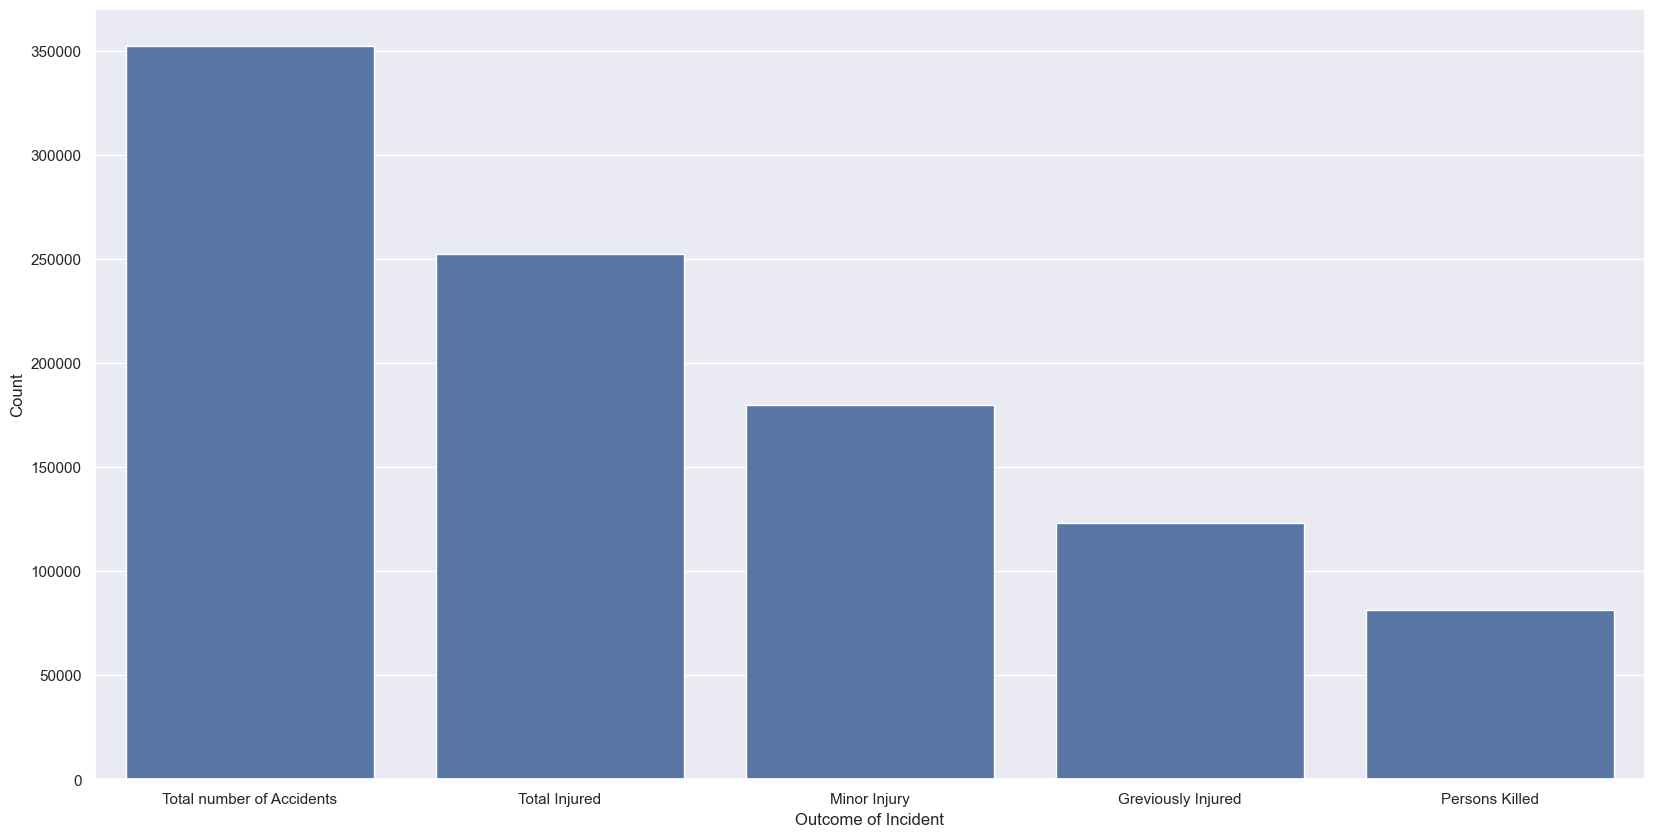

In [19]:
injury = df.groupby(['Outcome of Incident'], as_index=False)['Count'].sum().sort_values(by='Count', ascending=False).head(10)
print(injury)
sns.barplot(data = injury, x = 'Outcome of Incident',y= 'Count')
sns.set(rc={'figure.figsize':(15,5)})
plt.show()

In [20]:
# Finding out the percentage injured
total_people = df[df['Outcome of Incident'] == 'Total number of Accidents']['Count'].sum()
injured_people = df[df['Outcome of Incident'] == 'Total Injured']['Count'].sum()
percentage_injured = (injured_people / total_people) * 100
print(f"Percentage of Injured people: {percentage_injured:.2f}%")

#Percentage of Minor Injury
total_people = df[df['Outcome of Incident'] == 'Total number of Accidents']['Count'].sum()
injured_people = df[df['Outcome of Incident'] == 'Minor Injury']['Count'].sum()
percentage_injured = (injured_people / total_people) * 100
print(f"Percentage of Minor Injury: {percentage_injured:.2f}%")

# Percentage of Greviously Injured
total_people = df[df['Outcome of Incident'] == 'Total number of Accidents']['Count'].sum()
injured_people = df[df['Outcome of Incident'] == 'Greviously Injured']['Count'].sum()
percentage_injured = (injured_people / total_people) * 100
print(f"Percentage of Greviously Injured: {percentage_injured:.2f}%")

# Percentage of Persons Killed
total_people = df[df['Outcome of Incident'] == 'Total number of Accidents']['Count'].sum()
injured_people = df[df['Outcome of Incident'] == 'Persons Killed']['Count'].sum()
percentage_injured = (injured_people / total_people) * 100
print(f"Percentage of Persons Killed: {percentage_injured:.2f}%")

Percentage of Injured people: 71.67%
Percentage of Minor Injury: 51.05%
Percentage of Greviously Injured: 34.96%
Percentage of Persons Killed: 23.06%


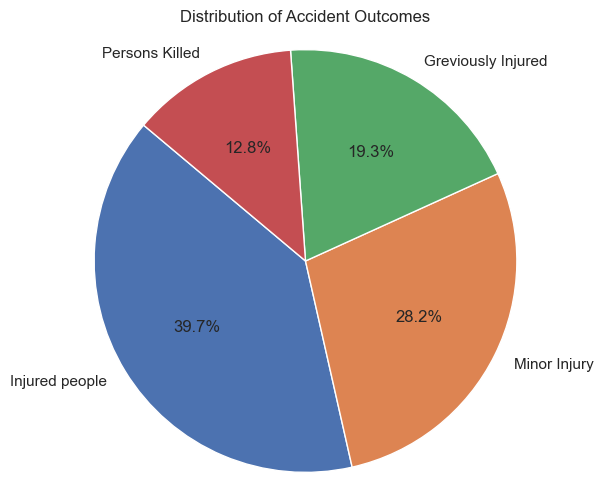

In [26]:
data = {
    'Outcome of Incident': ['Injured people', 'Minor Injury', 'Greviously Injured', 'Persons Killed'],
    'Total Outcome': [71.67, 51.05, 34.96, 23.06]
}

df = pd.DataFrame(data)
labels = df['Outcome of Incident']
sizes = df['Total Outcome'] 

# Plot
plt.figure(figsize=(6,6))  # Optional: control figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accident Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

## CONCLUSION

## The cities with max numbers of accidents are Chennai, Delhi, Jabalpur, Bengaluru and Indore. The main causes of accidents are junction, road features, traffic control, traffic violation, weather and impacting vehicles/objects. The government needs to give more emphasis on improving the visibility of approaching vehicles at Junctions, improvement of road features, strict traffic control, imposing strict traffic rules, etc. The citizens also need to follow traffic rules more seriously and co-operate with the government on taking up the overall precautions of the accidents.